<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

fatal: destination path 'Project_DS' already exists and is not an empty directory.


In [3]:
# !pip install optuna optuna-dashboard


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 9.2 MB/s eta 0:00:00


In [4]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
import xgboost as xgb
import lightgbm as lgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [5]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [6]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [7]:
# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✅ LightGBM Results (with Feature Selection)
Accuracy: 0.9169491525423729
Macro-F1: 0.7915176686575813
                        precision    recall  f1-score   support

       aggressive-scan       0.67      0.67      0.67        18
         cryptojacking       1.00      1.00      1.00       165
            icmp-flood       0.69      0.85      0.76        13
    icmp-fragmentation       1.00      0.92      0.96        13
icmp-fragmentation_old       0.50      0.33      0.40         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.56      0.77      0.65        13
               os-scan       0.71      0.83      0.77         6
             port-scan       0.68      0.68      0.68        19
        push-ack-flood       1.00      1.00      1.00        12
      serice-detection       0.83      0.83      0.83         6
     service-detection       0.50      0.36      0.42        14
             syn-flood       1.00      1.00      1.00        13


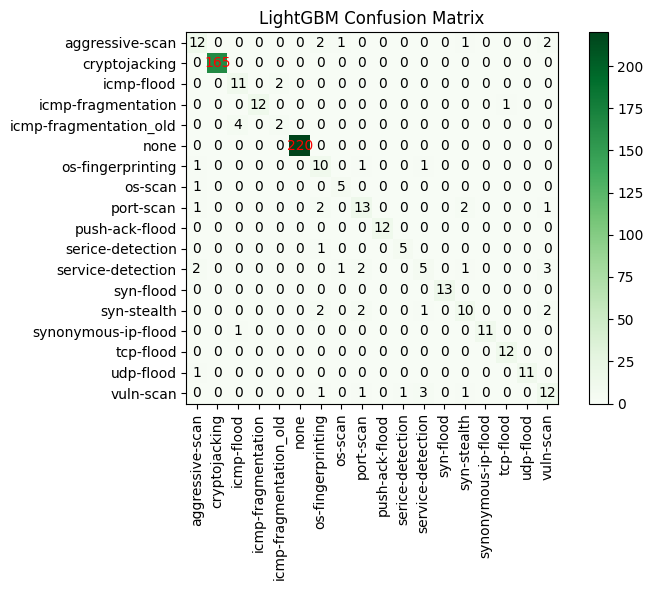

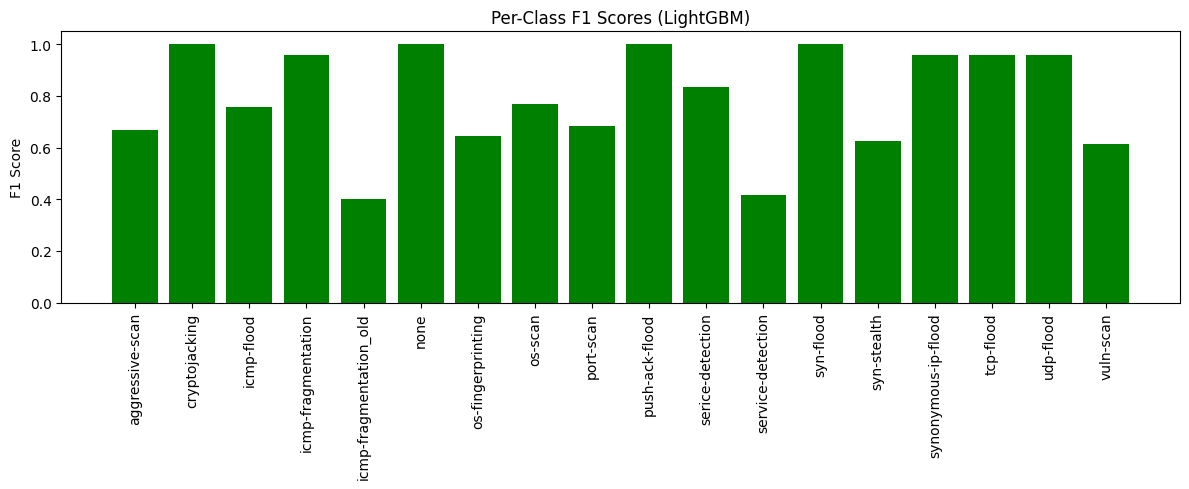

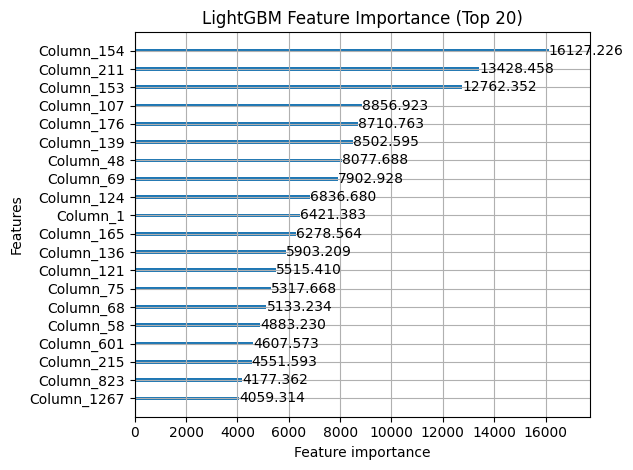

🔍 Generating SHAP values (may take some time)...


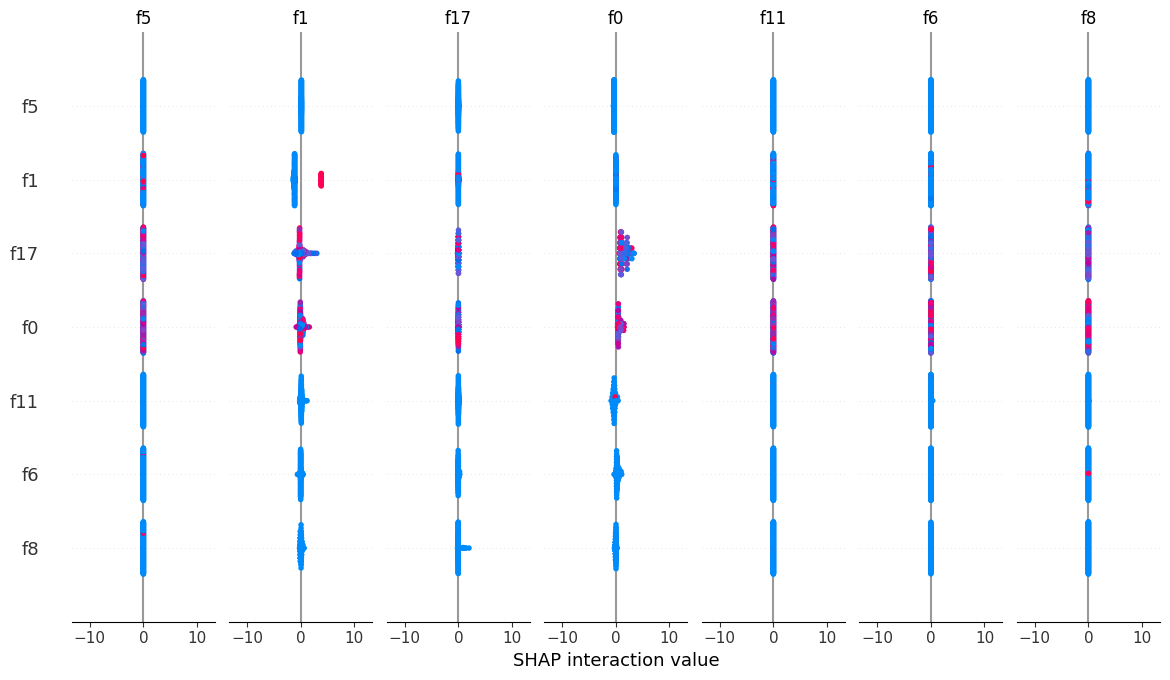

<Figure size 640x480 with 0 Axes>

📂 Saved: results_lightgbm.json and plots (Confusion, F1, Feature Importance, SHAP)


In [9]:

# Flatten raw
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ================================================================
# LightGBM with Feature Selection + SHAP
# ================================================================
from sklearn.feature_selection import SelectFromModel
import shap

# -----------------------
# Feature Selection (XGBoost-based)
# -----------------------
print("🔍 Running feature selection...")
xgb_fs = xgb.XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, tree_method="hist"
)
xgb_fs.fit(X_train_flat, y_train)

selector = SelectFromModel(xgb_fs, prefit=True, threshold="median")  # keep top 50% features
X_train_sel = selector.transform(X_train_flat)
X_val_sel = selector.transform(X_val_flat)
X_test_sel = selector.transform(X_test_flat)

print(f"✅ Reduced features: {X_train_sel.shape[1]} (from {X_train_flat.shape[1]})")

# -----------------------
# LightGBM Training
# -----------------------
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multiclass",
    class_weight="balanced",
    random_state=42
)

lgb_model.fit(
    X_train_sel, y_train,
    eval_set=[(X_val_sel, y_val)],
    eval_metric="multi_logloss"
)

# -----------------------
# Predictions & Metrics
# -----------------------
y_pred_lgb = lgb_model.predict(X_test_sel)

acc_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average="macro")
report_lgb = classification_report(y_test, y_pred_lgb, target_names=classes, zero_division=0)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

print("\n✅ LightGBM Results (with Feature Selection)")
print("Accuracy:", acc_lgb)
print("Macro-F1:", f1_lgb)
print(report_lgb)

# -----------------------
# Confusion Matrix
# -----------------------
plt.figure(figsize=(8, 6))
plt.imshow(cm_lgb, cmap="Greens")
plt.title("LightGBM Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
for i in range(cm_lgb.shape[0]):
    for j in range(cm_lgb.shape[1]):
        plt.text(j, i, cm_lgb[i, j], ha="center", va="center",
                 color="red" if cm_lgb[i, j] > cm_lgb.max()/2 else "black")
plt.tight_layout()
plt.savefig("LightGBM_confusion_matrix.png")
plt.show()

# -----------------------
# Per-Class F1
# -----------------------
prec, rec, f1, support = precision_recall_fscore_support(y_test, y_pred_lgb, zero_division=0)
plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="green")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (LightGBM)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("LightGBM_f1_per_class.png")
plt.show()

# -----------------------
# Feature Importance
# -----------------------
lgb.plot_importance(lgb_model, max_num_features=20, importance_type="gain")
plt.title("LightGBM Feature Importance (Top 20)")
plt.tight_layout()
plt.savefig("LightGBM_feature_importance.png")
plt.show()

# -----------------------
# SHAP Explainability
# -----------------------
print("🔍 Generating SHAP values (may take some time)...")
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test_sel[:200])  # limit for speed

shap.summary_plot(shap_values, X_test_sel[:200], feature_names=[f"f{i}" for i in range(X_test_sel.shape[1])])
plt.savefig("LightGBM_shap_summary.png", bbox_inches="tight")
plt.show()

# -----------------------
# Save Results
# -----------------------
results_lgb = {
    "accuracy": float(acc_lgb),
    "macro_f1": float(f1_lgb),
    "report": report_lgb,
    "confusion_matrix": cm_lgb.tolist()
}
with open("results_lightgbm.json", "w") as f:
    json.dump(results_lgb, f, indent=4)

print("📂 Saved: results_lightgbm.json and plots (Confusion, F1, Feature Importance, SHAP)")

